For Tensorflow with GPU, run this notebook via WSL:

PS C:\Users\dougr> wsl

(base) drandrade@Doug-PC:/mnt/c/Users/dougr$ jupyter-notebook

# Perogi's Emotions Classification Model - Convolutional Neural Network with Transfer Learning and Fine-Tuning

2024-05-12 18:15:18.320489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 18:15:18.320655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 18:15:18.341805: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-12 18:15:18.410614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 18:15:19.678708: W tensorflow/compiler/tf2

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

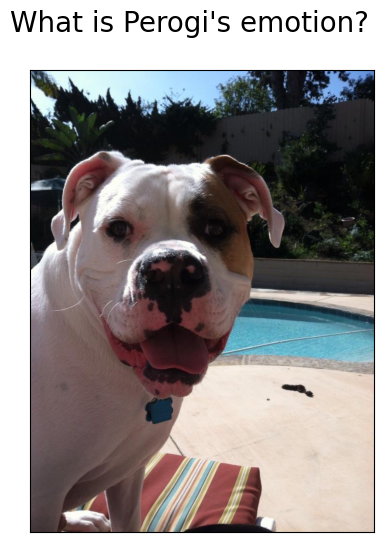

In [1]:
from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (128, 128, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

# Set new plot subclasses to iterate over random predictions
fig5, ax5 = plt.subplots(figsize = (10, 6))
fig5.suptitle('What is Perogi\'s emotion?', size = 20)
ax5.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_3501.jpg'))

plt.tight_layout


## Project Overview

### Motivation
The motivation of this project is to explore the application of Convolutional Neural Network (CNN) modeling with `Keras` and `TensorFlow` using a single NVIDIA graphics processing unit (GPU). After the passing of my wife's American Bulldog, Perogi, my wife inspired me to leverage this project to classify images of Perogi's life with particular interest in efficiently sorting out his happiest moments.

### Image Dataset
The project intended to begin with the simple but manually intensive approach of building a personally designed `Tensorflow` CNN model trained on $100$ manually labeled images of Perogi. However, I came across a labeled dataset on Kaggle's [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) dataset, which came with $15,921$ images stored within four labeled sub-directories *angry*, *happy*, *relaxed*, *sad* ([Devzohaib, 2022](#ref6)).

##### Data Set Exploration and Preparation
On initial image visualization and data exploration, it became apparent that the "Dog Emotion" images were inconsistently labeled, likely due to varied and biased opinions of what a *angry*, *happy*, *relaxed*, *sad* dog looks like. There were $6,596$ images of animals other than dogs, such as cartoons, lions, cats, monkeys, cows, horses, rabbits, etc. Consequently, I elected to manually re-label images based on consistent and objective emotional features, with an additional fifth class - *alert*. For ease of coding to associate directory-labeled titles with one-hot encoding, I adjusted the label names to have exactly five characters each, for a final dataset total of $9,325$ images:
- *alert* - The appearance of vigilance and attention toward something (wide eyes, stiff ears, rigid body).
- *angry* - The appearance of growling, with an aggressive display of teeth.
- *frown* - The appearance of dejection, pain, or abuse.
- *happy* - The display of the tongue, with a near human-like appearance of a smile.
- *relax* - Laying down or having the appearance of resting or doing nothing in particular.
        
$6,596$ images were removed for three reasons: 
- Images other than a real dog.
- The dog's face was not visible (i.e., facing away from the camera).
- It did not reasonably fall within one of the five classes (too unique, distorted, an outlier type emotion, etc.). 

This effort was an extremely slow and time-consuming process done; however, it underlined the criticality of data quality and maintenance to design a useful classification model ([Andrade, 2024](#ref1)).

The dataset was split into $80\%$ training and $20\%$ validation, and randomly shuffled to maximize each dataset’s combination of classes. The images are instantiated to a red, green, blue (RGB) color model of three-dimensional size ($128$x$128$x$3$).

### Model Development
I applied transfer learning and model fine-tuning to maximize my computer resources for optimal model performance. To establish a model performance standard and to validate my model development approach, I built and tested a few basics CNN models. The best non-transfer learning and non-fine-tuned CNN model my machine could handle achieved a maximum validation accuracy of ~$40\%$ with up to five hidden convolutional hidden layers, before exhausting local machine memory.

For the transfer learning CNN model, I selected the `EfficientNetV2S` model for its heuristic development as a small model ($6.8$ times smaller than other models trained on the ImageNet dataset) with improved training speed and parameter efficiency ([Tan, 2021](ref7)). I iterated over various combinations of fully connected dense layers added on top on `EfficientNetV2S`, while constraining the model training with categorical cross-entropy learning rate reduction and early stopping callback features ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S)).

Fine-tuning development was centered around finding the optimal `EfficientNetV2S` layer to be to unfrozen once the transfer learning training phase was completed ([Chollet, 2024](#ref3); [Krohn, 2020, p. 188](#ref5)).

### Model Evaluation
A combination of metric plotting (training and validation accuracy, categorical cross-entropy, and F1 Score), confusion matrix visualization (for class F1 Scoring), as well as a metrics record table were used to evaluate model testing and performance ([Chollet, 2021, chap. 8](#ref3); [Krohn, 2020, chap. 10](#ref5)).

### Practical Evaluation
The final assessment, after a satisfactory model evaluation, was to observe how the model classified images of Perogi, and the introduction image.

## Project Outline<a id='outline'></a>

1. [Problem Statement and Objectives](#step1)
2. [Modeling Metrics](#step2)
3. [Load Required Modules](#step3)
4. [Set-Up the Python Environment](#step4)
5. [Load and Preview the Data](#step5)
6. [CNN Transfer Learning Model Design](#step6)
    1. [CNN Model Parameters](#step6.a)
    2. [CNN Callback Features](#step6.b)
    3. [CNN Transfer Learning Model set-up](#step6.c)
    4. [Train the CNN Transfer Learning Model](#step6.d)
    5. [CNN Transfer Learning Model Performance Analysis](#step6.e)
7. [CNN Fine-Tuning Model Design](#step7)
    1. [CNN Fine-Tuning Model Set-Up](#step7.a)
    2. [Train and Fine-Tune the CNN Transfer Model](#step7.b)
    3. [Fine-Tuned CNN transfer learning model performance analysis](#step7.c)
    4. [Display Predicted Emotions from Validation Set](#step7.d)
8. [Final CNN Model Confusion Matrix](#step8)
9. [Final CNN Model Evaluation on Unseen Images of Perogi](#step9)
10.  [Project Summary and Metrics History Review](#step10)

[References](#ref)

## Problem Statement<a id='step1'></a>
Create a CNN model that can appropriately label $202$ unseen images of my wife's late American Bulldog, Perogi. 

#### The data preparation, model design and training plan:
1. Manually clean and re-label Kaggle's [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) dataset into five classes (*angry*, *happy*, *pouty*, *relax*, *frown*), and randomly split into $80\%$ train and $20\%$ validation images. The cleaned, five-class image dataset can be accessed from [Kaggle: Dog Emotions - 5 Classes](https://www.kaggle.com/datasets/dougandrade/dog-emotions-5-classes).
2. Establish basic initial image size and modeling parameters to test a simple model's functionality and performance.
    - I started with grayscale images and standard parameters:
        - Large image `batch size`.
        - Small `epoch` limit.
        - `ReLU` activation layer.
        - `softmax` output layer.
    - I progressively refined my `batch size`, `epoch` limit, and activation layer settings.
3. Build a simple CNN model.
    - I built the model beginning with a single two-dimensional convolution (`Conv2D`) layer with the simple initial parameters.
    - I iteratively added `Conv2D` and `Dense` layer depth to the model, based on metrics improvement and computer resource limitations.   
4. Apply image augmentation to maximize training effectiveness on the limited training dataset size.
    - `RandomRotation` - image rotation up to $45^\circ$.
    - `RandomFlip` - flipping image across the vertical axis.
5. Tune `Conv2D` and `Dense` layer hyperparameters to improve validation accuracy and training efficiency.
6. Add overfitting control layers after each hidden Conv2D and Dense layer.
    - Pooling layers (`MaxPool2D`, `AveragePooling2D`, `GlobalAveragePooling2D`).
    - `BatchNormalization` layers.
    - `Dropout` layers of various ratios.
7. Visualize the training and validation results.
8. Apply transfer learning using Google's designed EfficientNetV2S and the CNN layers already built.
    - Re-apply steps $5-7$, monitoring for performance and efficiency.
9. Apply fine-tuning to improve the model's validation accuracy.
    - Iteratively unfreeze different `EfficientNetV2S` bottom layers for weight adjustment and evaluate model improvement.
10. Create the final training and validation performance plots.
    - Update the metrics plot.
    - Visualize examples of predictions versus actual labels.
    - Create a confusion matrix.
11. Apply the model on the $202$ unseen images of Perogi and provide a sample visual of Perogi and the predicted labels.
12. Test for the classification of the opening image of Perogi.

#### Desired Objective
The primary intent of the project was for self-learning and to develop an independent understanding of deep learning applications. The project's conclusion achieved the intent and provided a deeper understanding of how a CNN model is designed and built. The ability to design a model to effectively recognize dog facial emotions on a personal laptop with a single GPU by leveraging transfer learning and fine tuning proved highly pragmatic.

The secondary objective was to satisfy a series of performance metrics (prioritized):
1. Consistently classify the opening image of Rogi as "Happy"
2. Achieve a validation accuracy $>= 70\%$ 
3. Achieve a class F1-Scores $>= 25\%$

[Return to the Project outline](#outline)

## Performance Metrics<a id='step2'></a>
Validation accuracy and validation categorical cross-entropy were the primary metrics applied to the model training, with the goal of achieving better performance than simple chance to predict one of four labels ($>20%$ accuracy) with the lowest categorical cross-entropy value.

- The Loss Function, also known as the objective function, is the model performance metric that will be calculated during each epoch of training to measure model performance. Entropy is the measure of uncertainty of the model's true predictions. Categorical cross-entropy is specifically applied to measure multi-classification problems with one-hot encoded labels. The model with the lowest entropy represents true predictions with the least uncertainty and therefore of most confidence ([TensorFlow Categorical Cross-Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy); [Krohn, p.113](ref5)).

- Optimizer Function is the function that will be applied to attempt to find the model's objective global minimum, using stochastic gradient descent (`SDG`) - the tensor equivalent of calculating the derivative of a scalar function or slope applied on random mini-batches across a large neural network. Root Mean Squared Propagation (`RMSProp`) is the specific optimizing function applied to minimize the loss function, which is an efficient adaptation of `SGD`. An improved extension to `RMSProp`, the adaptive moment estimate (`Adam`) is a computationally efficient and is well suited for problems that are large in terms of data and/or parameters ([TensorFlow Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers); [Adam: A Method for Stochastic Optimization](https://arxiv.org/pdf/1412.6980)).

- The monitoring metric to evaluate modeling training performance is accuracy. `Accuracy` is defined as the total number of predicted True Positives and True Negatives divided by the total data set size. This metric was preferred because I wanted to optimize the model weights based on the best possible accuracy, while measuring loss based on the best-possible cross-entropy ([TensorFlow Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).

[Return to the Project outline](#outline)

## Required Modules<a id='step3'></a>
- `Keras` and `TensorFlow` is the primary module used to perform CNN deep learning. Of particular interest is the decision to apply CNN transfer learning using the [EfficientNetV2S CNN model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2S) weights. 

- `Matplotlib` was the visualization library used for plotting the training and validation performance, validation image predictions, and Perogi image classifications. I applied the `ggplot` style, popular in R programming.

[Return to the Project outline](#outline)

In [2]:
import os
import cv2
import random
import datetime   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys # to check the version of Python

from keras import backend as K #for clearing out Tensorflow memory resources
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import mixed_precision

# Loading data sets 
from keras.utils import image_dataset_from_directory
#from imblearn.over_sampling import RandomOverSampler

# Callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard

# Transfer Learning models
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet_v2 import EfficientNetV2S

# Model layers
from keras.models import Sequential
from keras.layers import Input, Rescaling, RandomRotation, RandomTranslation, RandomContrast
from keras.layers import RandomFlip, Conv2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, Flatten, Dense

## Set-Up the Python Environment<a id='step4'></a>
The intent of this step is to:
- Confirm the `Python` and `TensorFlow` versions loaded.
- Confirm the `TensorFlow` installation is supported by NVIDIA's Compute Unified Device Architecture (CUDA).
    - CUDA is a software framework developed by NVIDIA to expand the capabilities of GPU acceleration. It allows developers to access the raw computing power of CUDA GPUs to process data faster than with traditional CPUs. ([GeeksforGeeks Introduction to CUDA](https://www.geeksforgeeks.org/introduction-to-cuda-programming/))
- Clear any computational graph and resources to prevent the accumulation of unused memory.
- Confirm my machine's NVIDIA GPU is available and configured to run `TensorFlow` operations.
- Limit `TensorFlow` to dynamically allocate only the necessary memory required by the GPU only when needed, ensuring GPU memory is not consumed unnecessarily all at once.
- Apply `mixed_precision` to default to lower precision operations $16$-bit `dtypes` (`float16`) when higher precision operations (`float32`) are not necessary. NVIDIA GPUs run efficiently on $16$-bit `dtypes` based on their hardware. `mixed_precision` allows for `Keras` to execute higher precision operations when necessary, affording an optimal computation efficiency for deep neural network training. (Deep Learning with Python chapter 13.2; [TensorFlow Mixed Precision](https://www.tensorflow.org/guide/mixed_precision))

[Return to the Project outline](#outline)

In [3]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)

Python version: 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
TensorFlow version: 2.15.0


In [4]:
# Check that the TensorFlow installation is built with NVIDIA's CUDA support for deep learning parallel computing
if tf.test.is_built_with_cuda():
    print("TensorFlow was built with CUDA support.")
else:
    print("TensorFlow was not built with CUDA support.")

TensorFlow was built with CUDA support.


In [5]:
# Clear/reset the computational graph and release/free-up Tensorflow memory resources
K.clear_session()

# Limit GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
        print('')

# Set mixed precision for computational efficiency
mixed_precision.set_global_policy('mixed_float16')


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


2024-05-12 18:15:22.209381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:22.498838: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:22.498896: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:22.500178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## Load and Preview the Data<a id='step5'></a>
During this step of the process, the intent is to understand the data that will be used to train and validate the model. The desired dataset characteristics are the following:
- Have total images for training a CNN model that can generalize well with unseen images.
- Create equal or "stratified" class distributions for training and validation.
- Have images of equal size, color mode, and features (face of each dog clearly visible and interpretable).
- Have images properly labeled, based on the criteria mentioned in the introduction.


The data's directory structure is organized under a parent folder, and further subdivided into five distinct folders based on the labeled classification.

`image_dataset_from_directory` returns a `tf.data.Dataset` object yielding a tuple `(images, labels)`, with the specified color mode (RGB), batch size, and image size.

The data is split $75\%$ into a training set and $25\%$ validation while the `image_dataset_from_directory` is called.

[Return to the Project outline](#outline)

In [6]:
# Basic dataset loading parameters
seed        = 27
img_dir = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/train_images_5_class'
img_size    = 128
batch_size  = 16

In [7]:
ds_train = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'training',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 6994 files for training.


2024-05-12 18:15:27.497808: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:27.497991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:27.498069: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:27.984766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-12 18:15:27.984936: I external/local_xla/xla/stream_executor

In [8]:
ds_val = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'validation',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 2331 files for validation.


In [9]:
# Check image shape and label shape
#class_names = ds_train.class_names
class_names = ['alert', 'angry', 'frown', 'happy', 'relax']
for image_batch, labels_batch in ds_train:
  print('Image shape: ', image_batch.shape)
  print('Label shape: ', labels_batch.shape)
  print('Label names: ', class_names)
  break

Image shape:  (16, 128, 128, 3)
Label shape:  (16, 5)
Label names:  ['alert', 'angry', 'frown', 'happy', 'relax']


In [10]:
# Print the file size of each class, for distribution comparison
for class_name in class_names:
    class_path = os.path.join(img_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        print(f'Total files in {class_name}: {file_count}')

Total files in alert: 1865
Total files in angry: 1865
Total files in frown: 1865
Total files in happy: 1865
Total files in relax: 1865


#### Review the Class Distribution<a id='step5.1'></a>
- I found the `image_dataset_from_directory` would not produce perfectly stratified class distributions in both the training and validation sets, likely due to the `shuffle = TRUE` parameter. To mitigate this, I ensured I hard coded `seed = 42` when loading the training and validation sets. 

- The hardcoding approach seemed to significantly improve the distribution. However, the distribution is not perfectly equal which is a potential cause of bias during model training toward the classes with the largest training population.

- To further mitigate any class bias during training, I set up a dictionary of class weights based on the training class distribution, to be applied during model training. 

[Return to the Project outline](#outline)

In [11]:
# Create a function to count the class distribution for the training and validation sets
def class_distribution_string(dataset, class_names):
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    
    # Convert class counts to a text string
    result_string = "\n".join([f'Total files in {class_name}: {count}' for class_name, count in class_counts.items()])
    
    return result_string

# Get and print the class distribution for the training dataset
train_distribution = class_distribution_string(ds_train, class_names)
print("Training Set Class Distribution:")
print(train_distribution)

# Get and print the class distribution for the validation dataset
val_distribution = class_distribution_string(ds_val, class_names)
print("\nValidation Set Class Distribution:")
print(val_distribution)

Training Set Class Distribution:
Total files in frown: 1397
Total files in angry: 1399
Total files in relax: 1397
Total files in happy: 1415
Total files in alert: 1386

Validation Set Class Distribution:
Total files in relax: 468
Total files in happy: 450
Total files in angry: 466
Total files in alert: 479
Total files in frown: 468


/tmp/ipykernel_480676/1939276329.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_480676/1939276329.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


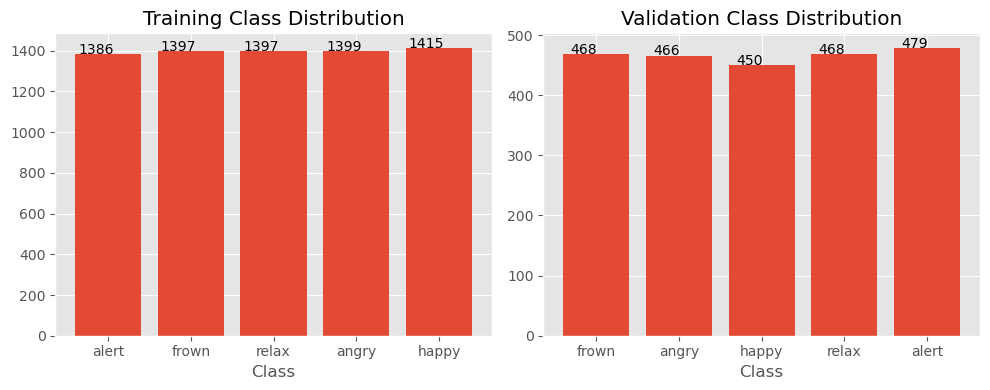

In [12]:
# Function to count class distribution
def class_distribution(dataset, class_names):
    #global class_counts
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

# Function to plot the class distribution
def plot_class_distribution(dataset, class_names):
    class_counts = class_distribution(dataset, class_names)
    
    #fig, ax = plt.subplots()
    bars = plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    #plt.ylabel('Count')
    plt.title('Image Class Distribution')
    
    # Add class count as text overlay on each bar
    for bar, value in zip(bars, class_counts.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                 bar.get_height() + 0.2, 
                 str(value), 
                 ha = 'center', 
                 color = 'black')
    plt.tight_layout()

# Plot the class distribution for the training dataset
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plot_class_distribution(ds_train, class_names)
plt.title('Training Class Distribution')

# Plot the validation class distribuition
plt.subplot(1, 2, 2)
plot_class_distribution(ds_val, class_names)
plt.title('Validation Class Distribution')

plt.tight_layout()
plt.show()

In [13]:
train_class_dist = class_distribution(ds_train, class_names)

weights = []
for i in train_class_dist.values():
    w = i / sum(train_class_dist.values())
    weights.append(w)
    
class_weight = dict(zip([0, 1, 2, 3, 4], weights))

#### Preview of Training Images
- Provided is a final review of the training data's label quality - a visual evaluation of 16 random images and their assigned label. 
- Initial review of the original dataset during this step revealed how poorly labeled the images were. This is also I learned the original dataset contained $6,596$ entities other than dogs or without the dog's face visible.
- I manually relabeled each image over a couple months to attempt to improve the dataset quality for training a CNN model. While the dataset (in my opinion) is vastly improved, it is still very subjective and heavily biased toward my opinion of what an *alert*, *angry*, *frown*, *happy*, and *relax* dog looks like.

[Return to the Project outline](#outline)

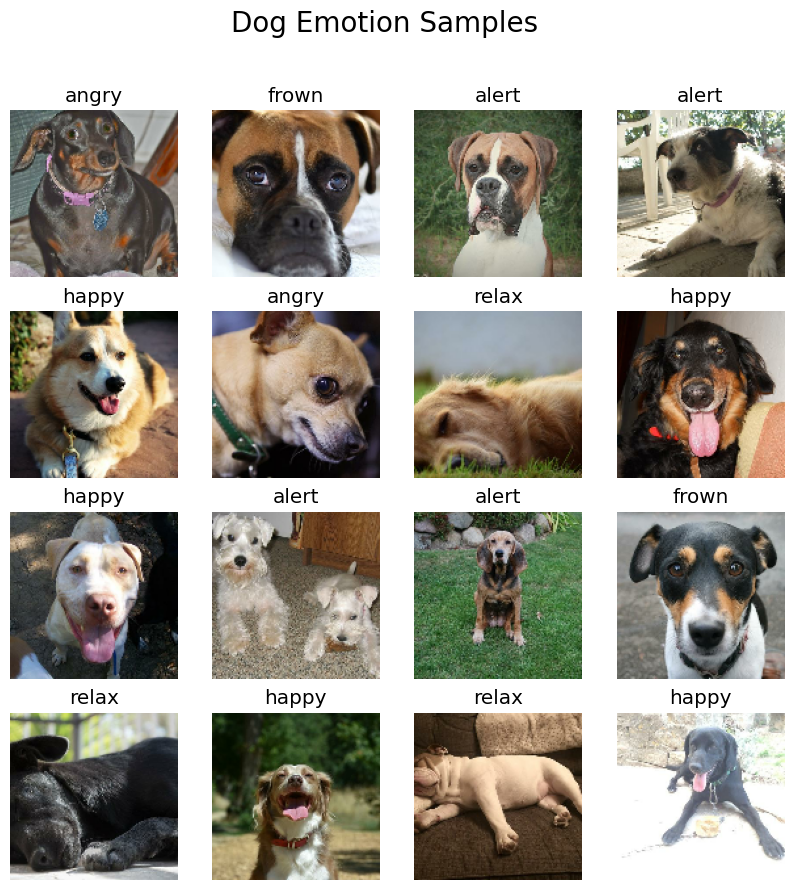

In [14]:
# Sample 16 random images for the training data set with their labels
plt.figure(figsize = (10, 10))
for images, labels in ds_train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds_train.class_names[int(tf.where(labels[i] == 1).numpy())])
    plt.suptitle('Dog Emotion Samples', fontsize = 20)
    plt.axis("off")

## CNN Transfer Learning Model Design<a id='step6'></a>

#### CNN Model Parameters<a id='step6.a'></a>
- Batch size 32 provided a good balance of model training performance improvement and computer resources ([Krohn, p.119](#ref5)).


- A maximum of $500$ epochs was arbitrarily selected as epoch limit for model training.


- Convolutional Parameters and Metrics
    - Kernel size of three is a common and well-established parameter for learning patterns within the image in $3$x$3$ pixel windows ([Krohn, p.168](#ref5)).
    - Pool size of $2$x$2$ provided to help reduce the dimensions of each input to hidden layers by a factor of two, minimizing the number of parameters required in computation ([Krohn, p.169](#ref5)).
    - Activation Layer of Leaky Rectified Linear Unit (`Leaky ReLU`) is an adjustment from the regular `ReLU` by returning a small negative value for a negative input instead of a zero. This approach helps neurons in each hidden layer to contribute to learning and extracting unique features from images by preventing the zero gradient traditionally observed in `ReLU` ([Krohn, p.94](#ref5)).
        - $Leaky \ ReLU \ (x) = \begin{cases} 0.2x & x < 0 \\ x & x \ge 0\end{cases}$
    - Loss (cost) function of categorical cross-entropy evaluates the dissimilarity between the predicted distribution and actual probability distribution of the classes. High probabilities for the correct class and low probabilities for the incorrect class is rewarded ([Krohn, p.113](#ref5)).
        - $Loss = -\sum_{i} y_{\text{true}, i} \log(y_{\text{pred}, i})$
    - Optimization algorithm of Adaptive Moment Estimation (`Adam`) provides adaptive learning rates that help fast convergence using the concept of momentum, bias correction, and improved memory use by not storing the full gradient record but instead referencing decaying average of prior gradients([Krohn, p.147](#ref5)).
        - I found reducing the learning rate by a tenth provided improved fine-tuning performance.
    - Metric of `Accuracy` is used for interpretability and comparison against other models. While the loss metric is the most valued during training, and `accuracy` is universally best understood, I also looked at the `F1 Score` as the harmonic mean of precision (portion of true positives out all positives) and `recall` (portion of true positives out actual positives) as another metric what mitigates for class imbalance.
  
  
- Overfitting Controls and Gradient Stabilization
    - Dropout ([Krohn, p.142](#ref5))
    - Batch Normalization ([Krohn, p.138](#ref5))
    - Image Augmentation ([Krohn, p.145](#ref5))


- Output Parameter
    - Output Activation layer of `Softmax` is designed for multi-classification model. The output is a vector that sums to $1$, and each element lies between $0$ and $1$, indicating the probability distribution of image's most likely label classification ([Krohn, p.106](#ref5)).

[Return to the Project outline](#outline)

In [15]:
# Layer paramters
kernel_size = 3
layer_act   = tf.keras.layers.LeakyReLU(alpha = 0.2, name = 'leaky_relu')
out_act     = 'softmax'
pool_size   = (2, 2)
FC_drop     = .0

# Modeling parameters
LR_param    = 0.001 
opt_tl      = tf.keras.optimizers.Adam(learning_rate = 0.001, name = 'adam_tl')
opt_ft      = tf.keras.optimizers.Adam(learning_rate = 0.00001, name = 'adam_ft')
loss_func   = tf.keras.losses.CategoricalCrossentropy(name = 'categorical_crossentropy')

metric      = ['accuracy',
               tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')]
epochs      = 500
#work_param  = multiprocessing.cpu_count()

#### CNN Callback Features<a id='step6.b'></a>
- The "reduce learning rate" callback provides improved model performance by reducing the learning rate by a certain factor after a certain number of epochs with no categorical cross-entropy (`loss` function) reduction, known as "patience" ([Chollet, p.188](#ref2)).
    - I applied a separate callback for the transfer learning training and the fine-tuning training, to enable fine tuning by more sensitive learning rate adjustments (the learning rate reduction factor was lowered from $0.5$ to $0.2$, and the patience requirement was raised).

- The "model checkpoint" saves the best model weights for future use ([Chollet, p.188)](#ref2)).

- The "early stop monitor" prevents the model from needlessly training to the $500$th epoch if no performance improvement (categorical cross-entropy loss function) is observed after six epochs (i.e. the categorical cross-entropy metric plateaus or indicates an increasing trend) ([Chollet, p.188](#ref2)).

[Return to the Project outline](#outline)

In [16]:
# Callback to reduce the RMSProp optimizing learning rate when the loss metric stops improving
call_LR = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 2,
                            verbose  = 1, 
                            factor   = 0.5,
                            min_lr   = 0.001)

call_LR_FT = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 3,
                            verbose  = 1, 
                            factor   = 0.2,
                            min_lr   = 0.00001)

# Callback to save the best metrics (validation accuracy)
call_save = ModelCheckpoint('C:/Users/dougr/Rogi_Emotions_CNN',
                            monitor = 'val_accuracy',
                            mode           = 'max',
                            verbose        = 1,
                            save_best_only = True)

# Callback to stop training after 6 epochs of validation loss (categorical cross-entropy) degredation
call_stop = EarlyStopping(monitor  = 'val_loss', 
                          mode     = 'min', 
                          verbose  = 1,
                          patience = 6)

#### CNN Transfer Learning Model Set-up<a id='step6.c'></a>
- The `TensorFlow AUTOTUNE` function is applied to the training and validation sets, enabling `TensorFlow` to efficiently utilize system resources, such as the CPU and GPU, by prefetching and caching data in memory, resulting in optimal model runtime and faster training times ([Better Performance with the TensorFlow.data API](https://www.tensorflow.org/guide/data_performance#overview)).

</break>

- **`EfficientNetV2S` Layer** is instantiated for transfer learning ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S)):
    - `include_top` is set the `False` so since this project's model has a specified five class output requirement and I intend to train on an custom top fully connected layer with pooling.
    - `weight` set to include the pretrained `ImageNet` weights to train on the five-class dog emotions dataset.
    - `input shape` parameter is required since `include_top` was set to `False`.
    - `include_preprocessing` parameter is defaulted to `True` to leverage the `EfficientNetV2S` normalization and consistency between the pretrained model and the five-class dog emotion dataset.
    
</break>

- The transfer learning CNN model consists of the following layers:
    - **Input Layer** of $128$ x $128$ x $3$
    - **Image Augmentation Layer** to make the training data more robust and generalizable to mitigate for overfitting:
        - *Random Flipping*
        - *Random Rotation* of images by a factor of $0.25$
        - *Random Translation* of the images by a factor of $0.1$ vertically and horizontally
        - *Random Contrast* of images by a factor of $0.25$
    - **Top Average Pooling Layer** to help the model's training efficient by reducing the number of parameters and dimension size of the EfficientNetV2S output for computational efficiency. 
        - Average Pooling extracts the average features of each input patch and is less sensitive to noise or large variance ([TensorFlow API AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)). 
        - Max Pooling extracts the most prominent feature of each grouping of pixels emphasizing the most important features while discarding more subtle information ([TensorFlow API MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)).
        - Max Pooling showed a slight improvement over Average Pooling on the base model without any top dense layers.
    - **Flatten Layer** is necessary to collapse the high dimensional arrays to a single dimension prior to the custom top dense layer and output layer, both of which require a one-dimension array ([Krohn, p.171, 173](#ref5)).
    - **Top Dense Layer** is a fully connected one-dimensional layer to receive the multi-dimensional arrays from the EfficentNV2S training and pooling layer reduction for recombination into an interpretable structure for class probability distribution. This layer applies the `Leaky ReLU` activation layer to continue the learning process with new top dense layer weights ([Krohn, p.173](#ref5)).
        - I began with a single 16-node dense layer (no drop-out) and iterative added an equivalent layer until performance degraded. I then returned to the best layer, and began iteratively testing nodes, drop-out, etc.
    - **Output Dense Layer** receives the top dense layer neurons and applies the `Softmax` algorithm for multi-classification probability distribution (i.e., $[0.2$, $0.6$, $0.03$, $0.1$, $0.07]$).

[Return to the Project outline](#outline)

[Go to the Project Summary and Metrics History Review](#step10)

In [17]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [18]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),
                          )
# Freeze the base_model
tl_model.trainable = False

In [19]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),)

# Freeze the base_model
tl_model.trainable = False

# Image Augmentation Layer
img_aug_layer = Sequential([
    RandomFlip(),
    RandomRotation(factor = 0.25),
    RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    RandomContrast(factor = 0.25),],
    name = 'Image_Augmentation')

# Top layer Pooling addition - MaxPool2D|AveragePooling2D. 
# MaxPool2D did a bit better on baseline TL model with no top dense layers
top_pooling_layer = Sequential([
    MaxPool2D(pool_size = pool_size, strides = pool_size, padding = 'valid'),
    BatchNormalization(),],
    name = 'Top_Pooling_Layer')

flatten_layer = Sequential([
    Flatten(),],
    name = 'Flatten_Layer')

# Top fully connected dense layer
top_FC_layer = Sequential([
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),],
    name = 'Top_Dense_Layers')

# Combined model with a specified name
model1 = Sequential(name = 'Transfer_Learning_Image_Classification')

# Add layers to the model
model1.add(Input((img_size, img_size, 3)))
model1.add(img_aug_layer)
model1.add(tl_model)
model1.add(top_pooling_layer)
model1.add(flatten_layer)
model1.add(top_FC_layer)
model1.add(Dense(units = len(class_names),
                 activation = out_act,
                 dtype = 'float32',
                 name = 'Multi-Class_Output'))

# Summarize the model
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"
_______________________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        Trainable  
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              Y          
                                                                                                               
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       N          
                                                                                                               
 Top_Pooling_Layer (Sequential)              (None, 2, 2, 1280)                      5120           Y          
                                                                                                               
 Flatten_Layer (Sequential)                  (None, 5120

#### Train the CNN Transfer Learning Model<a id='step6.d'></a>

- Compile the Model
    - **Optimizer** of choice is the adaptive moment estimate (`Adam`) algorithm, due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section.
    - **Loss** (or cost) parameter to minimize is `categorical cross-entropy`, as discussed [CNN Model Parameter](#step6.a) section. The `callback` feature for learning rate reduction and early stopping references the loss metric.
    - **Metrics** parameters to observe are `accuracy` and `F1 Score`.
    
</break>

- Fit the Model
    - **Class Weights** are applied, as discussed in the [Review the Class Distribution](#step5.1) section.
    - **Epochs** were set at a max of $500$, however with the callback feature this limit was never actually reached.
    - **Verbose** is set to $1$ to review model performance real-time.
    - **Validation** of the model is done with the validation data set ($25\%$ of the full dataset).
    - **Callback** feature is set for learning rate reduction at the rate of .001 for the optimizer algorithm (`Adam`), and early stopping references degrading loss parameter performance at a patience level of six `epochs`. Discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** is recorded, as part of the model performance evaluation against the time required to train the model.

[Return to the Project outline](#outline)

In [20]:
# Compile the model minimzing categorical cross-entropy with Adam optimization, while monitoring accuracy and F1 Score
model1.compile(
    optimizer = opt_tl,
    loss = loss_func,
    metrics = metric)

In [21]:
# Start the model runtime
start_time = datetime.datetime.now()

# Train the CNN model up to 500 max epochs and an early stop callback
fit_history1 = model1.fit(ds_train,
                          class_weight = class_weight,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = ds_val,
                          callbacks = [call_LR, call_stop])
# Stop the model runtime
stop_time = datetime.datetime.now()

Epoch 1/500


2024-05-12 18:16:13.960147: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-12 18:16:14.167533: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-12 18:16:16.371968: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa30c003460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 18:16:16.372011: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-12 18:16:16.418780: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715552176.606329  480745 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/438 [==============================] - 55s 78ms/step - loss: 0.3347 - accuracy: 0.2549 - f1_score: 0.0430 - val_loss: 1.5666 - val_accuracy: 0.2947 - val_f1_score: 0.0485 - lr: 0.0010
Epoch 2/500
438/438 [==============================] - 31s 70ms/step - loss: 0.3041 - accuracy: 0.3158 - f1_score: 0.0644 - val_loss: 1.4813 - val_accuracy: 0.3531 - val_f1_score: 0.1025 - lr: 0.0010
Epoch 3/500
438/438 [==============================] - 30s 68ms/step - loss: 0.2927 - accuracy: 0.3566 - f1_score: 0.0949 - val_loss: 1.3977 - val_accuracy: 0.3990 - val_f1_score: 0.1105 - lr: 0.0010
Epoch 4/500
438/438 [==============================] - 41s 92ms/step - loss: 0.2844 - accuracy: 0.3832 - f1_score: 0.1346 - val_loss: 1.3721 - val_accuracy: 0.4101 - val_f1_score: 0.1641 - lr: 0.0010
Epoch 5/500
438/438 [==============================] - 33s 75ms/step - loss: 0.2807 - accuracy: 0.3890 - f1_score: 0.1498 - val_loss: 1.3581 - val_accuracy: 0.4097 - val_f1_score: 0.1822 - lr: 0.0010
Epoch 6/500


In [22]:
# Print the model runtime
tl_time = stop_time - start_time
print ('Time required for training Model: ', tl_time)

Time required for training Model:  0:21:27.299200


#### CNN Transfer Learning Model Performance Analysis<a id='step6.e'></a>
Initial modeling training with transfer learning and four hidden dense layers resulted in a top validation accuracy of $54.54\%$ and minimal categorial cross-entropy of $1.1404$ after $30$ epochs.

[Return to the Project outline](#outline)

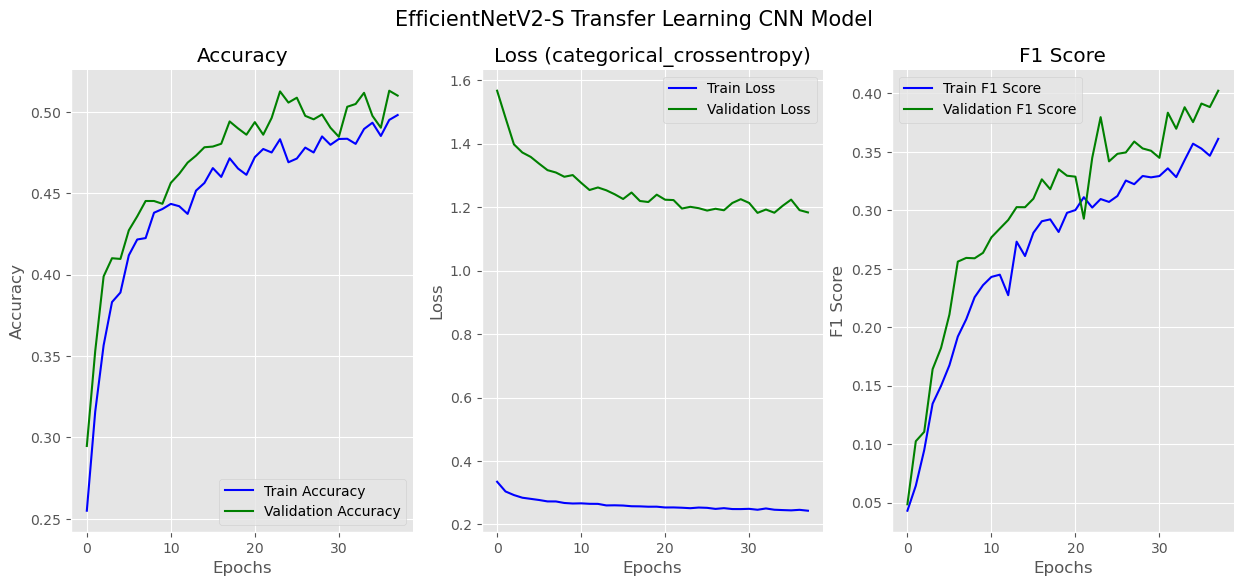

In [23]:
# Collect training and validation metric data from the model training
acc        = fit_history1.history['accuracy']    
val_acc    = fit_history1.history['val_accuracy']
loss       = fit_history1.history['loss']
val_loss   = fit_history1.history['val_loss']
f1         = fit_history1.history['f1_score']
val_f1     = fit_history1.history['val_f1_score']
num_epochs = range(len(acc))

# Plot the Training and Test accuracy over all the epochs
fig1, ax1 = plt.subplots(1, 3, figsize = (15, 6))
fig1.suptitle('EfficientNetV2-S Transfer Learning CNN Model', c = 'k', fontsize = '15')

ax1[0].plot(acc, 'b-', label = 'Train Accuracy')
ax1[0].plot(val_acc, 'g-', label = 'Validation Accuracy')
ax1[0].set_title('Accuracy')
ax1[0].legend()
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Accuracy')
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)

ax1[1].plot(loss, 'b-', label = 'Train Loss')
ax1[1].plot(val_loss, 'g-', label = 'Validation Loss')
ax1[1].set_title('Loss (' + loss_func.name + ')')     
ax1[1].legend()
ax1[1].set_xlabel('Epochs')                                            
ax1[1].set_ylabel('Loss')
ax1[1].spines['right'].set_visible(False)
ax1[1].spines['top'].set_visible(False)

ax1[2].plot(f1, 'b-', label = 'Train F1 Score')
ax1[2].plot(val_f1, 'g-', label = 'Validation F1 Score')
ax1[2].set_title('F1 Score')     
ax1[2].legend()
ax1[2].set_xlabel('Epochs')                                            
ax1[2].set_ylabel('F1 Score')
ax1[2].spines['right'].set_visible(False)
ax1[2].spines['top'].set_visible(False)

plt.show()
fig1.savefig('Model_plot_tl.jpg')

In [24]:
# Show Model validation metric output
tl_val_loss, tl_val_acc, tl_val_f1 = model1.evaluate(ds_val)

146/146 [==============================] - 4s 30ms/step - loss: 1.1832 - accuracy: 0.5101 - f1_score: 0.4023


## CNN Fine-Tuning Model Design<a id='step7'></a>

Initially, the fine-tuning stage was done in inference mode (i.e., the EfficientNetV2S weights were left untouched), while I evaluated the transfer learning model performance. Once a certain level of improvement was achieved, relative to runtime and rate of improvement, the model evaluation transitioned to fine-tuning modeling. 

While evaluating the fine-tuning model performance, the focus was to determine if there was an optimal number of EfficientNetV2S layers to unfreeze for training (change the model's hidden layer weights), without impacting the EfficentNetV2S batch normalization layer's statistics ([Chollet, 2024)](#ref3)).

[Return to the Project outline](#outline)

#### CNN Fine-Tuning Model Set-up<a id='step7.a'></a>

- The decision to do fine-tune in inference mode, or to unfreeze the EfficientNetV2S weights is decided once the transfer learning model is satisfactory (generally targeting a $> 50\% \ accuracy$ and $< 1.0 \ loss$).
- EfficientNetV2S batch normalization layers always remain in inference mode for modeling stability ([Chollet, 2024](#ref3)).

[Return to the Project outline](#outline)

In [25]:
# Un-freeze the top layers of the model
#tl_model.trainable = True
print('Number of layers in the base model: ', len(tl_model.layers))
print('Number of layers in the final model: ', len(model1.layers))

Number of layers in the base model:  513
Number of layers in the final model:  6


In [26]:
# Set-up the fine-tuning for interfence, or to train on the ImageNet weights on layers 
ft_inference = 'yes'

# Select a block to begin fine-tuning EfficientNetV2S layer
fine_tune_layer = tl_model.layers.index(tl_model.get_layer('block6d_expand_conv'))

if ft_inference == 'yes':
    tl_model.trainable = False
    fine_tune_layer = None

elif ft_inference == 'no':
    tl_model.trainable = True
    
    # Set batch normalization layers to inference mode
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

elif ft_inference == 'partial':
    #Freeze all the layers before the 'fine_tune_layer' layer
    for layer in tl_model.layers[ : fine_tune_layer]:
        layer.trainable = False
        # Set batch normalization layers to inference mode
    
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

In [27]:
#tl_model.summary(line_length = 100, show_trainable = True)

In [28]:
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"
_______________________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        Trainable  
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              Y          
                                                                                                               
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       N          
                                                                                                               
 Top_Pooling_Layer (Sequential)              (None, 2, 2, 1280)                      5120           Y          
                                                                                                               
 Flatten_Layer (Sequential)                  (None, 5120

#### Train and Fine-Tune the CNN Transfer Learning Model<a id='step7.b'></a>

- Compile the Model
    - **Optimizer** of choice is the adaptive moment estimate (`Adam`) algorithm, due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section, and in the [Train the CNN Transfer Learning Model](#step6.d) section. The only difference is the learning rate is reduced from $0.001$ to $0.00001$ for small incremental pre-trained weight updates, since we are now training on a much larger model at the risk of overfitting ([Chollet, 2024](#ref3)).
    - **Loss** (or cost) parameter to minimize is `categorical cross-entropy`, as discussed [CNN Model Parameter](#step6.a) section and [Train the CNN Transfer Learning Model](#step6.d) section. The `callback` feature for learning rate reduction and early stopping references the loss metric.
    - **Metrics** parameters to observe are `accuracy` and `F1 Score`, just like the transfer learning model.
    
</break>

- Fit the Model
    - **Epochs** remain at a max of $500$, however with the callback feature limit was never actually reached in fine-tuning.
    - **Initial Epoch** is identified to pick-up on fine-tuning at where the transfer learning epoch ended ($last \ epoch \ +1$).
    - **Verbose** is set to $1$ to review model performance real-time.
    - **Validation** of the model is done with the validation data set ($25\%$ of the full dataset).
    - **Callback** feature is set for learning rate reduction at the rate of $0.00001$ for the optimizer algorithm (`Adam`), and early stopping references a loss parameter performance degradation with a “patience” level of six `epochs`. Discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** is recorded, as part of the model performance evaluation against the time required to train the model.

[Return to the Project outline](#outline)

In [29]:
# Compile the model
model1.compile(
    optimizer = opt_ft,
    loss = loss_func,
    metrics = metric)

# Start the model run time
second_start_time = datetime.datetime.now()

# Train the CNN model
history1_fine = model1.fit(ds_train,
                           epochs = epochs,
                           initial_epoch = fit_history1.epoch[-1],
                           verbose = 1,
                           validation_data = ds_val,
                           callbacks = [call_LR_FT, call_stop])

# Stop the model run time
second_stop_time = datetime.datetime.now()
ft_time = second_stop_time - second_start_time
print ('Time required for fine-tuning the model: ', ft_time)

Epoch 38/500
438/438 [==============================] - 64s 98ms/step - loss: 1.2253 - accuracy: 0.4890 - f1_score: 0.3702 - val_loss: 1.1904 - val_accuracy: 0.5105 - val_f1_score: 0.3890 - lr: 1.0000e-05
Epoch 39/500
438/438 [==============================] - 41s 93ms/step - loss: 1.2062 - accuracy: 0.5040 - f1_score: 0.3722 - val_loss: 1.1874 - val_accuracy: 0.5118 - val_f1_score: 0.3926 - lr: 1.0000e-05
Epoch 40/500
438/438 [==============================] - 31s 71ms/step - loss: 1.2162 - accuracy: 0.4934 - f1_score: 0.3643 - val_loss: 1.1900 - val_accuracy: 0.5109 - val_f1_score: 0.3896 - lr: 1.0000e-05
Epoch 41/500
438/438 [==============================] - 29s 67ms/step - loss: 1.2072 - accuracy: 0.4941 - f1_score: 0.3685 - val_loss: 1.1873 - val_accuracy: 0.5139 - val_f1_score: 0.3924 - lr: 1.0000e-05
Epoch 42/500
438/438 [==============================] - 28s 64ms/step - loss: 1.2101 - accuracy: 0.5024 - f1_score: 0.3654 - val_loss: 1.1823 - val_accuracy: 0.5157 - val_f1_score:

#### Fine-Tuned CNN Transfer Leaning Model Performance Analysis<a id='step7.c'></a>

The model would generally see an improvement of about $20\%$ or more (from ~$50\%$ accuracy to ~$60\%$ accuracy) between the transfer learning performance and final fine-tuned performance.

The plot visualizes the immediate increase in performance, capturing the significant value of fine-tuning to model performance.

I found that unfreezing the `EfficientNetV2S` layers for weight training generally provides minimal performance. Instead, final model performance was most impacted by the transfer learning model design, especially as it relates to the optimizing algorithm and learning rate, drop-out setting, and combinations of the top dense layer design.

[Return to the Project outline](#outline)

In [30]:
# Collect training and validation metric data from the model training
acc_ft       = acc
acc_ft      += history1_fine.history['accuracy']
val_acc_ft   = val_acc
val_acc_ft  += history1_fine.history['val_accuracy']

loss_ft      = loss
loss_ft     += history1_fine.history['loss']
val_loss_ft  = val_loss
val_loss_ft += history1_fine.history['val_loss']

f1_ft        = f1
f1_ft       += history1_fine.history['f1_score']
val_f1_ft    = val_f1
val_f1_ft   += history1_fine.history['val_f1_score']

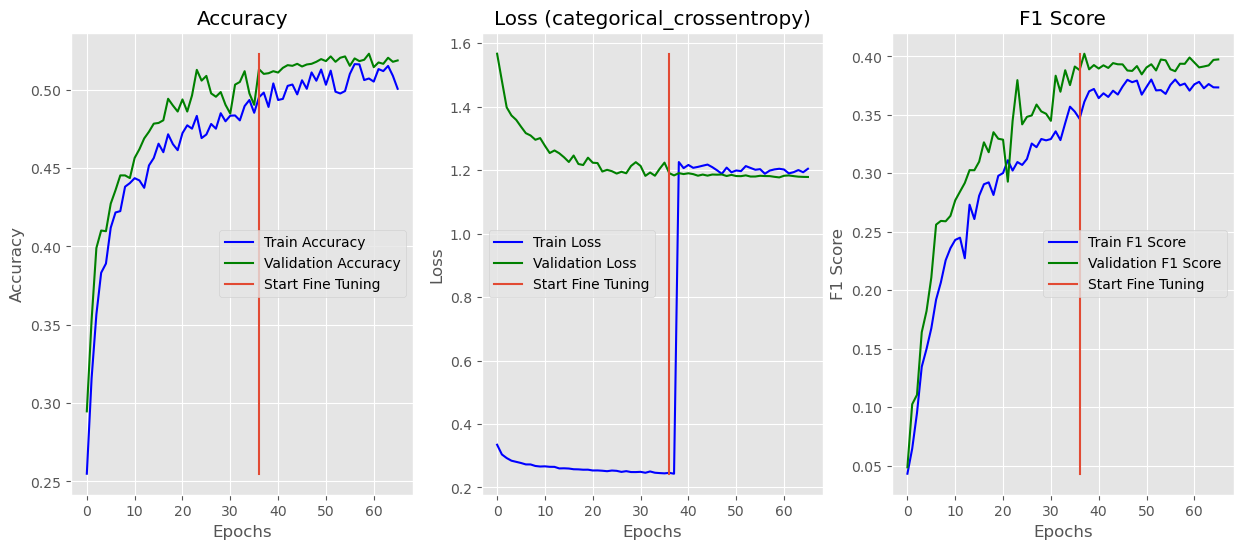

In [31]:
# Plot the Training and Test accuracy over all the epochs
fig2, ax2 = plt.subplots(1, 3, figsize = (15, 6))
#fig1.subtitle('CNN Model', c = 'k', fontsize = '15')

ax2[0].plot(acc_ft, 'b-', label = 'Train Accuracy')
ax2[0].plot(val_acc_ft, 'g-', label = 'Validation Accuracy')   
ax2[0].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(acc), min(acc_ft), min(val_acc), min(val_acc_ft)), max(max(acc), max(acc_ft), max(val_acc), max(val_acc_ft))],
            label = 'Start Fine Tuning')
ax2[0].set_title('Accuracy')
ax2[0].legend()
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Accuracy')

ax2[1].plot(loss_ft, 'b-', label = 'Train Loss')
ax2[1].plot(val_loss_ft, 'g-', label = 'Validation Loss')
ax2[1].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(loss), min(loss_ft), min(val_loss), min(val_loss_ft)), max(max(loss), max(loss_ft), max(val_loss), max(val_loss_ft))], 
            label = 'Start Fine Tuning')
ax2[1].set_title('Loss (' + loss_func.name + ')')
ax2[1].legend()
ax2[1].set_xlabel('Epochs')                                             
ax2[1].set_ylabel('Loss')

ax2[2].plot(f1_ft, 'b-', label = 'Train F1 Score')
ax2[2].plot(val_f1_ft, 'g-', label = 'Validation F1 Score')
ax2[2].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(f1), min(f1_ft), min(val_f1), min(val_f1_ft)), max(max(f1), max(f1_ft), max(val_f1), max(val_f1_ft))], 
            label = 'Start Fine Tuning')
ax2[2].set_title('F1 Score')
ax2[2].legend()
ax2[2].set_xlabel('Epochs')                                             
ax2[2].set_ylabel('F1 Score')

plt.show()
fig2.savefig('Model_plot_ft.jpg')

In [32]:
# Show Fine-Tuned Model output
ft_val_loss, ft_val_acc, ft_val_f1 = model1.evaluate(ds_val)

146/146 [==============================] - 5s 33ms/step - loss: 1.1783 - accuracy: 0.5187 - f1_score: 0.3974


#### Display Predicted Emotions from the Validation Dataset<a id='step7.d'></a>

To subjectively evaluate the model performance, we visualize the predicted labeling for the validation data set. 

[Return to the Project outline](#outline)

In [33]:
# Recall the Validation data set
ds_val = image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    validation_split = .2,
    subset = 'validation')

Found 9325 files belonging to 5 classes.
Using 1865 files for validation.


In [34]:
# Get validation predictions
val_probs = model1.predict(ds_val)

117/117 [==============================] - 9s 40ms/step


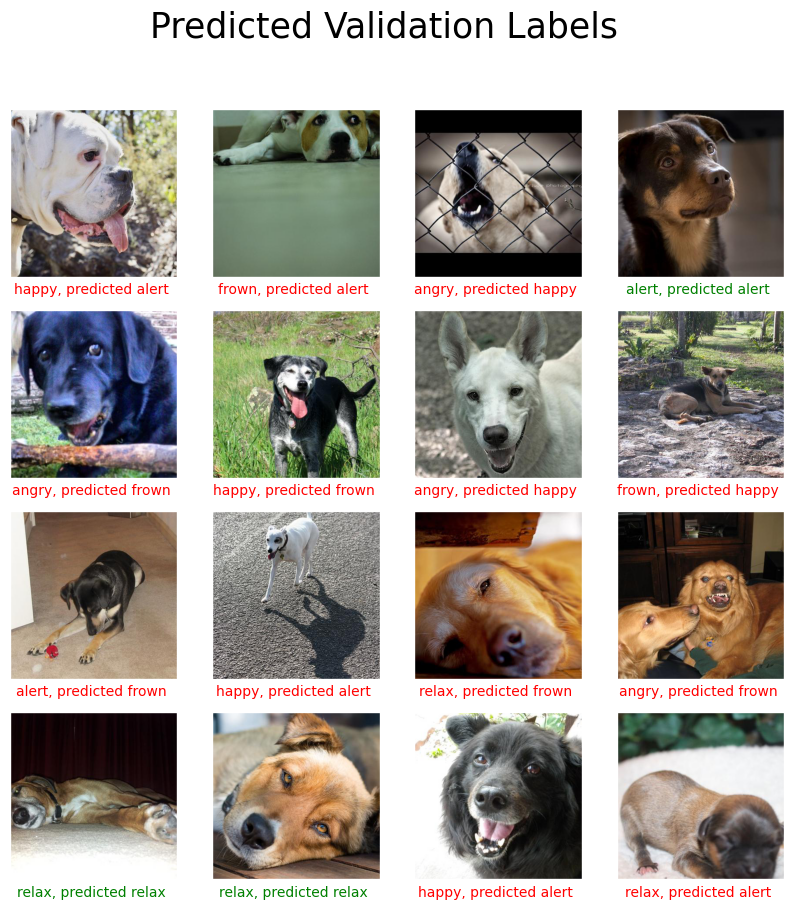

In [35]:
from tensorflow.keras.preprocessing.image import load_img
# Set total number of images to plot
num_pics = 16

# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_val.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig3, ax3 = plt.subplots(figsize = (10, 10))
ax3.remove()

for i in range(num_pics):
    fig3.suptitle('Predicted Validation Labels', size = 25)
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(val_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    actual = ds_val.file_paths[start_index + i][85:90]
    
    if pred != actual:
        col = 'r'
    else:
        col = 'g'
    
    plt.xlabel('{}, predicted {} '.format(actual, pred), 
               color = col, fontsize = 10)
    plt.imshow(load_img(ds_val.file_paths[start_index + i]))
    
    plt.tight_layout

## Final CNN Model Confusion Matrix<a id='step8'></a>

A key evaluation step is to review the confusion matrix. Accuracy alone is deceiving and does not well represent the performance across five classes (which is why the F1 Score was included as a model metric).

Of particular interest is the F1 Score for each individual class, as part of my secondary model evaluation objectives to monitor and maximize ($> \ 25\%$ `F1 Score` for each class).

The secondary objective was to satisfy a series of performance metrics (prioritized):
1. Consistently classify the opening image of Rogi as *happy*
    - The objective was easily met, as seen in the history of [model performance table](#step10).
2. Achieve a validation accuracy $>= 70%$
    - The objective was quite challenging. Most models would peak between $59-60\%$.
3. Achieve class F1 Scores of $>= 25%$
    - Like objective #$2$, the majority of model class F1 Scores would peak between $19-23\%$.

[Return to the Project outline](#outline)

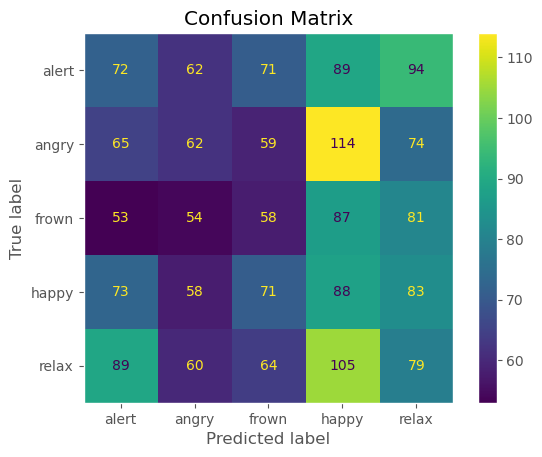

              precision    recall  f1-score   support

       alert       0.19      0.20      0.19       352
       angry       0.17      0.21      0.19       296
       frown       0.17      0.18      0.18       323
       happy       0.24      0.18      0.21       483
       relax       0.20      0.19      0.20       411

    accuracy                           0.19      1865
   macro avg       0.19      0.19      0.19      1865
weighted avg       0.20      0.19      0.19      1865



In [36]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

val_preds = list(val_probs.argmax(axis = 1))

val_labels = [label[85:90] for label in ds_val.file_paths]

lab_encoder = preprocessing.LabelEncoder()
lab_encoder.fit(val_labels)
val_actual_labels = lab_encoder.transform(val_labels)

def cm_plot_metrics(actual_labels, pred_labels, label_names):
    cm = confusion_matrix(actual_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                  display_labels = label_names)
    
    disp.plot()
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(classification_report(pred_labels, actual_labels, 
                                target_names = label_names))

cm_plot_metrics(val_actual_labels, 
                val_preds, 
                class_names)

## Final CNN Model Evaluation on Unseen Images of Perogi<a id='step9'></a>

This step, while purely subjective, is arguably the most important step. If the customer or user doesn't agree with the model's predicted emotion labels for Perogi, then nothing else matters. The secondary objective metrics are critical for statistical significance to validate the model's ability to effectively train on the dataset and generalize to a validation dataset (to a degree, without a separate test dataset).

The $201$ images of Perogi represent unseen and unlabeled images, however the "true" or "actual" labels exist in the opinion of my wife. In my opinion, the model did exceptionally well on the Perogi images - I would agree with nearly all the labels. 

Unfortunately, my wife wasn't as impressed. This was insightful in that the determination of what would appear for my wife as *happy* versus *sad* or *angry* for Perogi is extremely subjective and tied to memories that are associated with the pictures.

Dogs are highly expressive animals, and the human's perspective of what a *happy* dog looks like can be extremely skewed and influenced by unrelated factors (i.e., a dog's mouth formed in such a way that looks like a human smile).

Nevertheless, the final takeaway is that this model requires the customer's involvement from the beginning when I cleaned and relabeled the full training dataset. The relabeling of the full training dataset is $100\%$ representative of my opinion about what an *alert*, *angry*, *frown*, *happy*, and *sad* dog looks like, and not my wife's opinion.

[Return to the Project outline](#outline)

#### Read in Rogi Images

In [37]:
directory_path = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images'

# Create dataset for unseen Rogi images
ds_rogi = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    labels = None,  # Labels will be inferred from subdirectory names
    class_names = None,  # Class names will be inferred
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = False,  # No need to shuffle for unseen data
    seed = seed
)

Found 212 files belonging to 1 classes.


#### Predict and Plot Perogi's Emotions

[Return to the Project outline](#outline)

In [38]:
# Predict Rogi label probabilities
rogi_probs = model1.predict(ds_rogi)

14/14 [==============================] - 7s 146ms/step


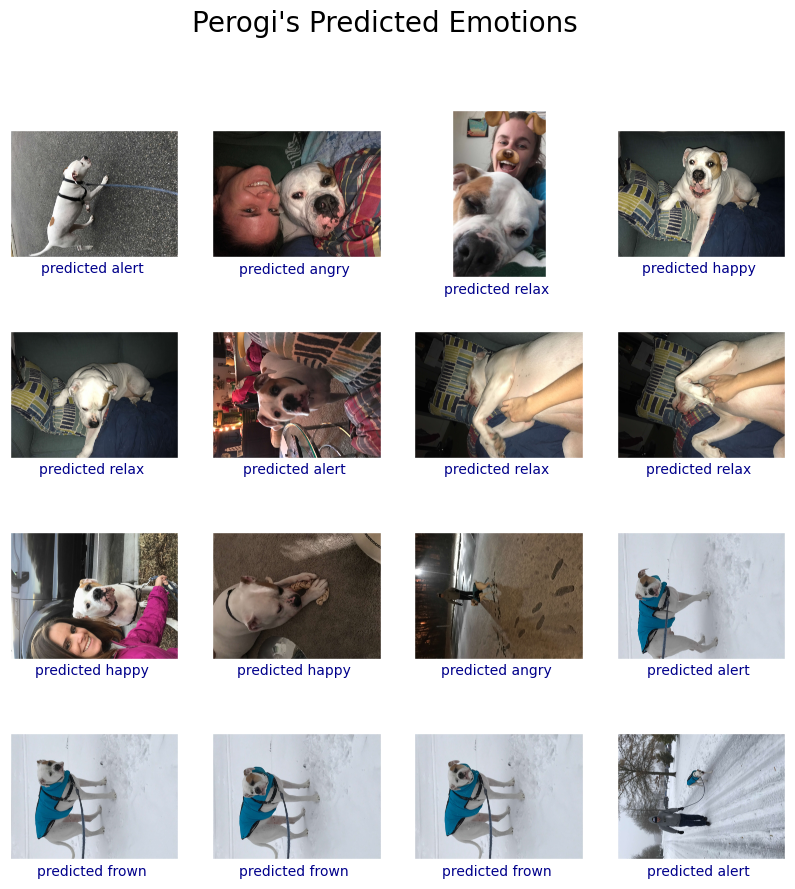

In [39]:
# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_rogi.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig4, ax4 = plt.subplots(figsize = (10, 10))
fig4.suptitle('Perogi\'s Predicted Emotions', size = 20)
ax4.remove()

for i in range(num_pics):
    
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(rogi_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
    plt.imshow(load_img(ds_rogi.file_paths[start_index + i]))

    plt.tight_layout

1/1 [==============================] - 1s 1s/step


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

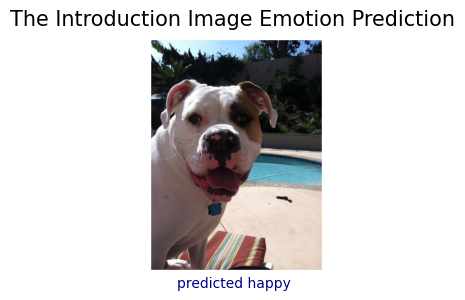

In [40]:
#Run the model on the introduction image of Perogi

from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (img_size, img_size, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

intro_image_pred = model1.predict(load(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_3501.jpg'))

# Set new plot subclasses to iterate over random predictions
fig5, ax5 = plt.subplots(figsize = (3, 3))
fig5.suptitle('The Introduction Image Emotion Prediction', size = 15)
ax5.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

pred = np.argmax(intro_image_pred)
if pred == 0:
    pred = class_names[0] 
elif pred == 1:
    pred = class_names[1] 
elif pred == 2:
    pred = class_names[2]
elif pred == 3:
    pred = class_names[3]
else:
    pred = class_names[4]

plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_3501.jpg'))

plt.tight_layout

## Project Summary and Metrics History Review<a id='step10'></a>

This final summary of metrics was used to help guide in modeling design. It heuristically captures key metrics (regrettably not all) that list the progression of model development that influenced my iterative decision making to seek out my secondary objective metrics.

[Return to the Project outline](#outline)

In [41]:
# Check if the file already exists in the working directory
file_path = 'model_testing_df.csv'  # Change 'your_dataframe.csv' to the desired file name

if not os.path.exists(file_path):
    # Create a new DataFrame (replace this with your actual data)
    model_testing_df = pd.DataFrame(columns = ['ID',
                                               'Accuracy',
                                               'F1 Score',
                                               'Loss',
                                               'Rogi Happy',
                                               'Training Time',
                                               'Epochs',
                                               'Batch Size',
                                               'Hidden Activation',
                                               'Output Acitvation',
                                               'Optimizer',
                                               'Transfer Learning Model',
                                               'Top CNN Layer',
                                               '# Hidden Layers',
                                               'Dropout',
                                               'Fine Tuning Layer'])


    # Save the updated DataFrame to the same file
    model_testing_df.to_csv(file_path, index = False)
    print(f"DataFrame saved to {file_path}")
else:
    # Load the existing DataFrame
    model_testing_df = pd.read_csv(file_path)
    
    acc = ft_val_acc
    f1 = ft_val_f1
    loss = ft_val_loss
    rogi_happy = pred
    time = str(tl_time + ft_time)
    epoch = len(history1_fine.epoch) + len(fit_history1.epoch) - 1
    batch = batch_size
    h_act = layer_act.name
    o_act = out_act
    opt = opt_ft.name
    tlm = tl_model.name
    top_cnn = any(isinstance(layer, Conv2D) for layer in model1.layers)
    drop = FC_drop
    # Find the index of the 'Top_FC_Hidden_Layers' layer in the model
    top_FC_layer_index = 0#model1.layers.index(top_FC_layer)
    # Extract the Dense layers within 'Top_FC_Hidden_Layers'   top_FC_layer
    hidden_layer = len([layer for layer in model1.layers[4].layers if isinstance(layer, Dense)])
    ft_layer = fine_tune_layer
    ID = len(model_testing_df.index) + 1
    
    model_testing_df.loc[len(model_testing_df.index)] = [ID,
                                                         acc,
                                                         f1,
                                                         loss,
                                                         rogi_happy,
                                                         time,
                                                         epoch,
                                                         batch,
                                                         h_act,
                                                         o_act,
                                                         opt,
                                                         tlm,
                                                         top_cnn,
                                                         hidden_layer,
                                                         drop,
                                                         ft_layer] 

    # Save the updated DataFrame to the same file
    model_testing_df.to_csv(file_path, index = False)

In [42]:
model_testing_df

,ID,Accuracy,F1 Score,Loss,Rogi Happy,Training Time,Epochs,Batch Size,Hidden Activation,Output Acitvation,Optimizer,Transfer Learning Model,Top CNN Layer,# Hidden Layers,Dropout,Fine Tuning Layer
0,1,0.498498,0.453023,1.281342,happy,0:42:16.934800,89,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,0,0.0,NaN
1,2,0.491205,0.414595,1.229144,happy,0:28:25.790502,60,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,0,0.0,NaN
2,3,0.495066,0.378394,1.235943,happy,0:25:10.324125,54,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,0,0.0,NaN
3,4,0.495066,0.413788,1.222056,happy,0:25:52.894164,57,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,0,0.0,NaN
4,9,0.516517,0.408747,1.172550,happy,0:39:15.966345,84,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,1,0.0,NaN
5,6,0.519949,0.402310,1.164361,happy,0:31:50.779282,56,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,2,0.0,NaN
6,7,0.502360,0.389287,1.172231,happy,0:29:45.649732,55,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,3,0.0,NaN
7,8,0.507079,0.379265,1.172099,happy,0:32:44.359228,62,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,4,0.0,NaN
8,9,0.525526,0.411237,1.156255,happy,0:45:29.346558,83,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,5,0.0,NaN
9,10,0.518661,0.397441,1.178282,happy,0:36:49.756143,65,16,leaky_relu,softmax,adam_ft,efficientnetv2-s,False,6,0.0,NaN


[Return to the CNN Transfer Learning Model Set-up](#step6.c)

In [43]:
'''# Assuming your model is named 'model1'
dense_layers_info = {}

for i, layer in enumerate(model1.layers):
    if isinstance(layer, Dense):
        if hasattr(layer, 'units'):
            dense_layers_info[i + 1] = layer.units
        else:
            print(f"Warning: Dense layer {i + 1} does not have 'units' attribute.")
    else:
        print(f"Skipping layer {i + 1} as it is not a Dense layer.")

# Print the dictionary
print(dense_layers_info)'''

'# Assuming your model is named \'model1\'\ndense_layers_info = {}\n\nfor i, layer in enumerate(model1.layers):\n    if isinstance(layer, Dense):\n        if hasattr(layer, \'units\'):\n            dense_layers_info[i + 1] = layer.units\n        else:\n            print(f"Warning: Dense layer {i + 1} does not have \'units\' attribute.")\n    else:\n        print(f"Skipping layer {i + 1} as it is not a Dense layer.")\n\n# Print the dictionary\nprint(dense_layers_info)'

In [44]:
'''
model_testing_df1 = pd.read_csv('model_testing_df1.csv')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Columns to normalize
columns_to_normalize = ["Accuracy", "Loss", "F1 Score"]

# Columns to standardize
columns_to_standardize = ["Accuracy", "Loss", "F1 Score"]

# Standardization (Z-score normalization)
scaler = StandardScaler()
model_testing_df1[columns_to_standardize] = scaler.fit_transform(model_testing_df1[columns_to_standardize])


# Calculate the performance rating (example formula)
model_testing_df1["Performance Rating"] = (
    model_testing_df1["Accuracy"] +
    (model_testing_df1["Loss"]) +
    model_testing_df1["F1 Score"]
) / 3.0

# Sort the DataFrame by "Performance Rating" in descending order
model_testing_df1 = model_testing_df1.sort_values(by="Performance Rating", ascending=False)

# Save the updated DataFrame to the same file
#model_testing_df1.to_csv(file_path, index=False)
model_testing_df1
'''

'\nmodel_testing_df1 = pd.read_csv(\'model_testing_df1.csv\')\n\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\n\n# Columns to normalize\ncolumns_to_normalize = ["Accuracy", "Loss", "F1 Score"]\n\n# Columns to standardize\ncolumns_to_standardize = ["Accuracy", "Loss", "F1 Score"]\n\n# Standardization (Z-score normalization)\nscaler = StandardScaler()\nmodel_testing_df1[columns_to_standardize] = scaler.fit_transform(model_testing_df1[columns_to_standardize])\n\n\n# Calculate the performance rating (example formula)\nmodel_testing_df1["Performance Rating"] = (\n    model_testing_df1["Accuracy"] +\n    (model_testing_df1["Loss"]) +\n    model_testing_df1["F1 Score"]\n) / 3.0\n\n# Sort the DataFrame by "Performance Rating" in descending order\nmodel_testing_df1 = model_testing_df1.sort_values(by="Performance Rating", ascending=False)\n\n# Save the updated DataFrame to the same file\n#model_testing_df1.to_csv(file_path, index=False)\nmodel_

In [45]:
'''model_testing_df2 = pd.read_csv('model_testing_df2.csv')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Columns to normalize
columns_to_normalize = ["Accuracy", "Loss", "F1 Score"]

# Columns to standardize
columns_to_standardize = ["Accuracy", "Loss", "F1 Score"]

# Standardization (Z-score normalization)
scaler = StandardScaler()
model_testing_df2[columns_to_standardize] = scaler.fit_transform(model_testing_df2[columns_to_standardize])


# Calculate the performance rating (example formula)
model_testing_df2["Performance Rating"] = (
    model_testing_df2["Accuracy"] +
    (1 - model_testing_df2["Loss"]) +
    model_testing_df2["F1 Score"]
) / 3.0

# Sort the DataFrame by "Performance Rating" in descending order
model_testing_df2 = model_testing_df2.sort_values(by="Performance Rating", ascending=False)

# Save the updated DataFrame to the same file
#model_testing_df2.to_csv(file_path, index=False)
model_testing_df2
'''

'model_testing_df2 = pd.read_csv(\'model_testing_df2.csv\')\n\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\n\n# Columns to normalize\ncolumns_to_normalize = ["Accuracy", "Loss", "F1 Score"]\n\n# Columns to standardize\ncolumns_to_standardize = ["Accuracy", "Loss", "F1 Score"]\n\n# Standardization (Z-score normalization)\nscaler = StandardScaler()\nmodel_testing_df2[columns_to_standardize] = scaler.fit_transform(model_testing_df2[columns_to_standardize])\n\n\n# Calculate the performance rating (example formula)\nmodel_testing_df2["Performance Rating"] = (\n    model_testing_df2["Accuracy"] +\n    (1 - model_testing_df2["Loss"]) +\n    model_testing_df2["F1 Score"]\n) / 3.0\n\n# Sort the DataFrame by "Performance Rating" in descending order\nmodel_testing_df2 = model_testing_df2.sort_values(by="Performance Rating", ascending=False)\n\n# Save the updated DataFrame to the same file\n#model_testing_df2.to_csv(file_path, index=False)\nmode

## References<a id='ref'></a>
1. Andrade, D. (2024). Dog Emotions - 5 Classes [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8330954<a id='ref1'></a>
2. Chollet, F. (2021). Deep Learning with Python (2nd ed.). Manning Publications Co.<a id='ref2'></a>
3. Chollet, F. (2024, April 24). Transfer learning & fine-tuning: Tensorflow Core. TensorFlow. https://www.tensorflow.org/guide/keras/transfer_learning<a id='ref3'></a>
4. Keras: tensorflow V2.15.0. TensorFlow. (n.d.). https://www.tensorflow.org/api_docs/python/tf/keras<a id='ref4'></a>
5. Krohn, J., Beyleveld, G., & Bassens, A. (2020). Deep Learning Illustrated: A visual, Interactive Guide to Artificial Intelligence. Addison-Wesley.<a id='ref5'></a>
6. Kingma, D. P., & Ba, J. (2014). Adam: A Method for Stochastic Optimization. arXiv preprint arXiv:1412.6980.<a id='ref6'></a>
7. Devzohaib. (2022, October 3). Dog Emotions Prediction. Kaggle.https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction<a id='ref8'></a>
8. Tan, M., & Le, Q. (2021, July). Efficientnetv2: Smaller models and faster training. In International conference on machine learning (pp. 10096-10106). PMLR.<a id='ref8'></a>

[Return to the Project Outline](#plan)